In [1]:
# Import the required modules
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
import hvplot.pandas

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read in the CSV
filepath = "Resources/lending_data.csv"
df=pd.read_csv(filepath)
print(df.shape)
df.head()

(77536, 8)


,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


#### Check the data
---
Check to see if the data needs to be imputed, encoded, or scaled

In [3]:
# Check if data needs to be imputed or encoded
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


Data does not need to be imputed or encoded because there are no nulls and all values are numeric

In [4]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


Looking at the values, we will need to do a scaler on the features. There is a lot of variations between features, so we should scale the data\
Given the number of features, we will not reduce the number of features

In [5]:
# Define the features
features = ['loan_size', 'interest_rate', 'borrower_income', 'debt_to_income',
       'num_of_accounts', 'derogatory_marks', 'total_debt']

In [6]:
# Scaling
# subset
df_sub = df.loc[:, features]

# initialize
scaler = StandardScaler()

# fit
scaler.fit(df_sub)

# predict/transform
scaled_data = scaler.transform(df_sub)
df_scaled = pd.DataFrame(scaled_data, columns=features)

df_scaled.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


##### Define `X` and `y` and run a `train_test_split`

In [7]:
df.loan_status.value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

The data is very imbalanced. 96.8% of accounts have a loan status of 0 or are not at risk of defaulting.

In [8]:
# Get the Data
X = df_scaled
y = df.loan_status

# Run the train_test_split
# including `stratify=y` to ensure that the testing and training datasets maintain the same ratio of 0 and 1s for the loan status as exists in the
# original dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Review the y series and the X dataframe
display(y.head())
display(X.head())

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,0.427304,0.426837,0.427404,0.668571,0.616143,1.043996,0.427404
1,-0.671487,-0.674918,-0.671552,-0.802166,-0.434049,-0.673973,-0.671552
2,-0.384846,-0.370249,-0.372922,-0.344424,-0.434049,-0.673973,-0.372922
3,0.427304,0.417844,0.415459,0.655346,0.616143,1.043996,0.415459
4,0.475078,0.456068,0.451295,0.694873,0.616143,1.043996,0.451295


### Classification Model Function
---
Check to see how the following models predict the loan status

In [9]:
# Function for Classification
def classModel(model, X_train, X_test, y_train, y_test):
    """ 
    This function requires that the train-test split has already occurred and for a model to be initialized prior to the function being run.

    If the problem is a multi-class problem, the ROC Curve will break and the function cannot be used.

    Ex. `lr = LogisticRegression()`
    """
    # Step 3: Fit the model
    model.fit(X_train, y_train)
    
    # Step 4: Evaluate the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    train_proba = model.predict_proba(X_train)[:, 1]
    test_proba = model.predict_proba(X_test)[:, 1]

    # Generate metrics TRAIN
    train_cf = confusion_matrix(y_train, train_preds)
    train_cr = classification_report(y_train, train_preds)
    train_auc = roc_auc_score(y_train, train_proba)
    
    train_results = f"""TRAIN METRICS
    Confusion Matrix: 
    {train_cf}
    
    AUC: {train_auc}

    Classification Report:
    {train_cr}
    """
    
    print(train_results)

    # Generate metrics TEST
    test_cf = confusion_matrix(y_test, test_preds)
    test_cr = classification_report(y_test, test_preds)
    test_auc = roc_auc_score(y_test, test_proba)
    
    test_results = f"""TEST METRICS
    Confusion Matrix: 
    {test_cf}
    
    AUC: {test_auc}

    Classification Report:
    {test_cr}
    """
    
    print(test_results)

    # VISUALIZE TEST RESULTS
    # Confusion Matrix
    plt.figure(figsize=(4, 4))
    sns.heatmap(test_cf, annot=True, fmt='d', cmap='Blues', cbar=False, 
                xticklabels=['Predicted Negative', 'Predicted Positive'], 
                yticklabels=['Actual Negative', 'Actual Positive'])
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test.values, test_proba)
    
    # Set figure size
    plt.figure(figsize=(6, 6))
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {test_auc:.3f})')
    
    # Plot the diagonal reference line
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    
    # Titles and labels
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
    # Add grid and legend
    plt.grid(linestyle="--", color="lightgrey", alpha=0.75)
    plt.legend(loc="lower right")
    
    # Display the plot
    plt.show()

### Logistic Regression
---
Quality of the Logistic Regression: Very good. No signs of overfitting. There does appear to be a bit of Type 2 error given the 0.86 precision score, but with an Area under the Curve (AUC) of 0.996, accuracy of 0.99, and f1-score of .93, the model looks to be very good.\
\
The model predicts loan status very well, but is slightly better at predicting 0s than 1s (or, the model has a lower rate of false negatives than false positives)

TRAIN METRICS
    Confusion Matrix: 
    [[59683   345]
 [   37  1963]]
    
    AUC: 0.9945013368761246

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.98      0.91      2000

    accuracy                           0.99     62028
   macro avg       0.92      0.99      0.95     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [   14   486]]
    
    AUC: 0.9964888059701493

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.88      0.97      0.93       500

    accuracy                           0.99     15508
   macro avg       0.94      0.98      0.96     15508
weighted avg       1.00      0.99      1.00     15508

    


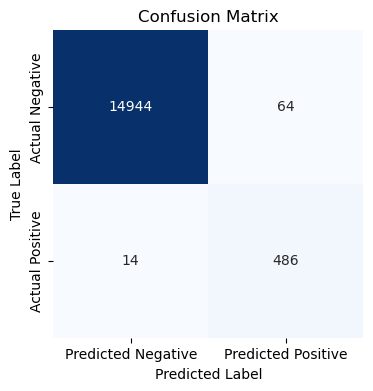

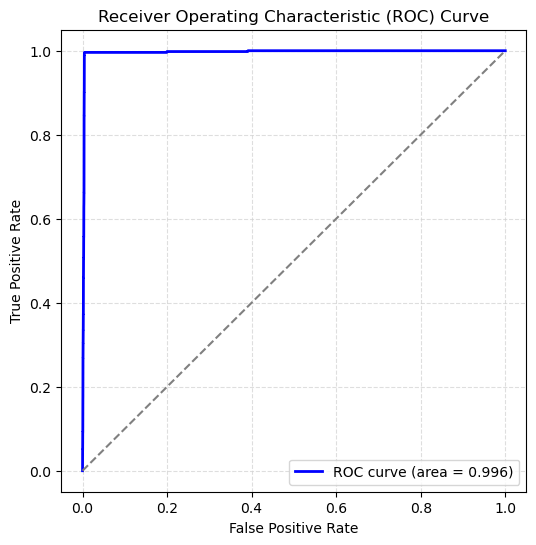

In [10]:
# Using classModel function
# init the model
lgr = LogisticRegression(random_state=1)

classModel(lgr, X_train, X_test, y_train, y_test)

### Additional Models
---
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- k-Nearest Neighbor (kNN)
- Extra Trees
- Ada Boost
- Gradient Boosting
- XGBoost
- Light GBM

#### Decision Tree

TRAIN METRICS
    Confusion Matrix: 
    [[59962    66]
 [  107  1893]]
    
    AUC: 0.9998424360298528

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     60028
           1       0.97      0.95      0.96      2000

    accuracy                           1.00     62028
   macro avg       0.98      0.97      0.98     62028
weighted avg       1.00      1.00      1.00     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14958    50]
 [  107   393]]
    
    AUC: 0.9337788512793177

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      0.99     15008
           1       0.89      0.79      0.83       500

    accuracy                           0.99     15508
   macro avg       0.94      0.89      0.91     15508
weighted avg       0.99      0.99      0.99     15508

    


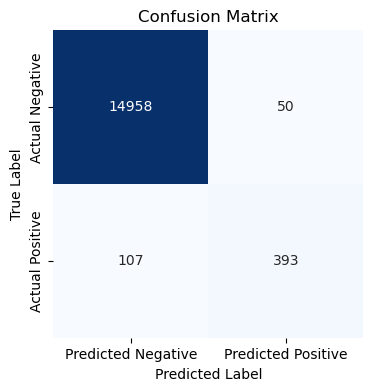

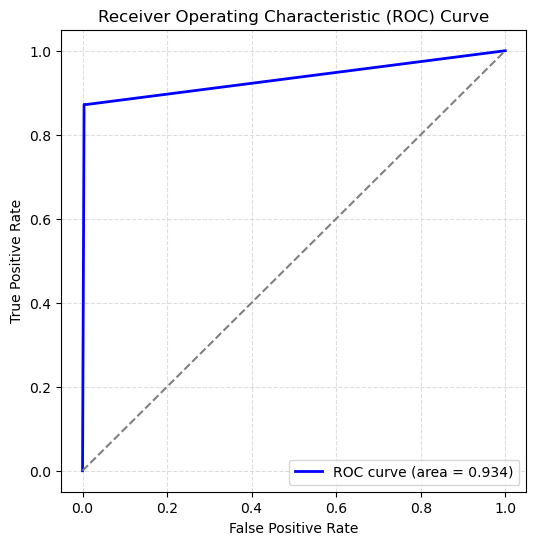

In [11]:
# Using classModel function
# init the model
dt = DecisionTreeClassifier(random_state=1)

classModel(dt, X_train, X_test, y_train, y_test)

#### Random Forest

TRAIN METRICS
    Confusion Matrix: 
    [[59881   147]
 [   26  1974]]
    
    AUC: 0.9998072191310722

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     60028
           1       0.93      0.99      0.96      2000

    accuracy                           1.00     62028
   macro avg       0.97      0.99      0.98     62028
weighted avg       1.00      1.00      1.00     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14955    53]
 [   72   428]]
    
    AUC: 0.9958875266524521

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.86      0.87       500

    accuracy                           0.99     15508
   macro avg       0.94      0.93      0.93     15508
weighted avg       0.99      0.99      0.99     15508

    


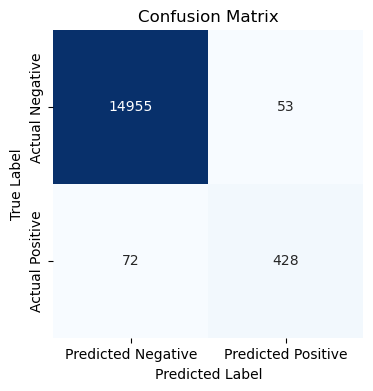

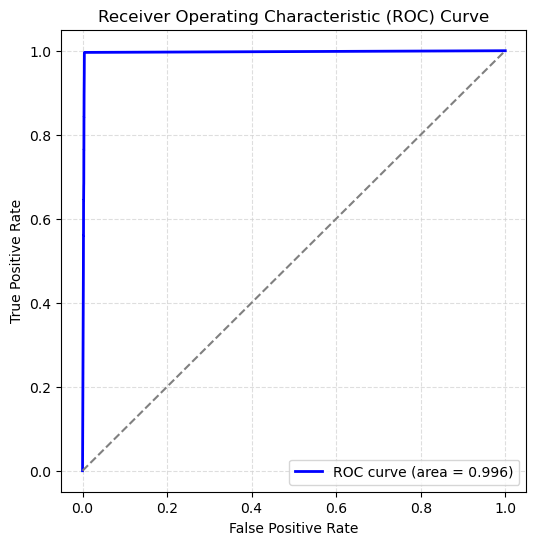

In [12]:
# Using classModel function
# init the model
rf = RandomForestClassifier(random_state=1)

classModel(rf, X_train, X_test, y_train, y_test)

#### Support Vector Machine (SVM)

TRAIN METRICS
    Confusion Matrix: 
    [[59674   354]
 [   12  1988]]
    
    AUC: 0.9957743261477977

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.92      0.99      0.96     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    3   497]]
    
    AUC: 0.9950055970149254

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.94       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


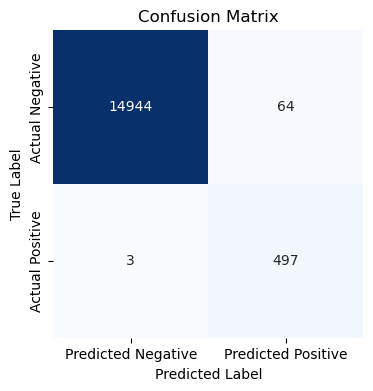

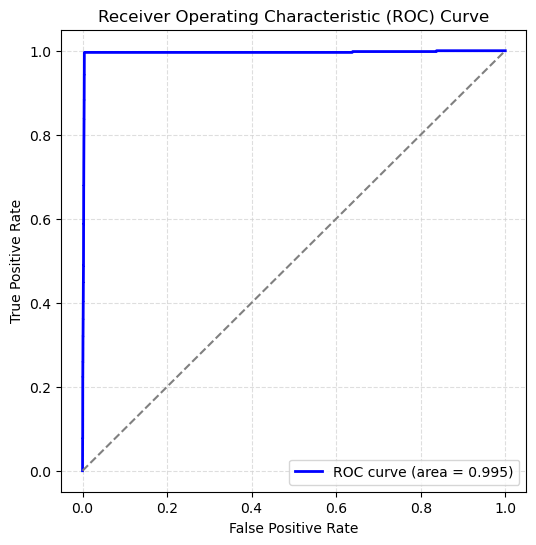

In [13]:
# Init the model
svc = SVC(probability=True)

# Do Machine Learning
classModel(svc, X_train, X_test, y_train, y_test)

#### k-Nearest Neighbor (kNN)

TRAIN METRICS
    Confusion Matrix: 
    [[59674   354]
 [   12  1988]]
    
    AUC: 0.9973269515892583

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.92      0.99      0.96     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    3   497]]
    
    AUC: 0.9958350213219617

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.94       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


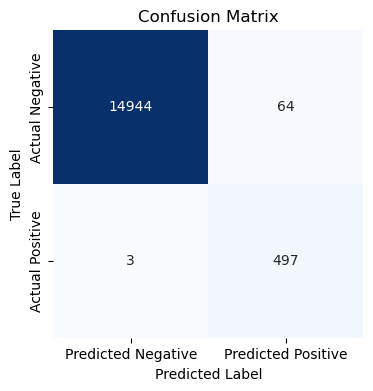

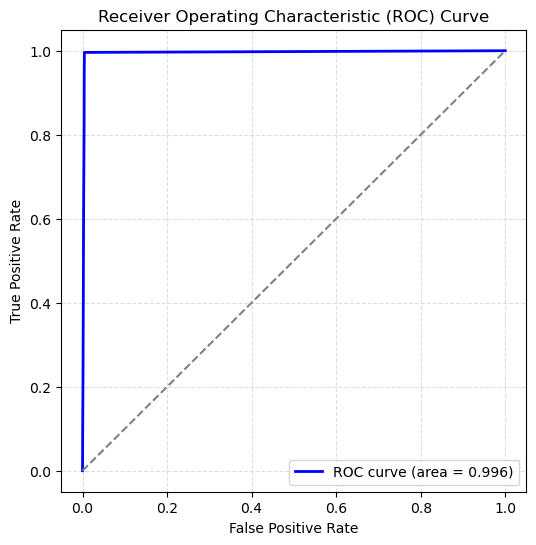

In [14]:
# Init the model
knn = KNeighborsClassifier(n_neighbors=25)

# Do Machine Learning
classModel(knn, X_train, X_test, y_train, y_test)

#### Extra Trees

TRAIN METRICS
    Confusion Matrix: 
    [[59962    66]
 [  107  1893]]
    
    AUC: 0.9998424360298528

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     60028
           1       0.97      0.95      0.96      2000

    accuracy                           1.00     62028
   macro avg       0.98      0.97      0.98     62028
weighted avg       1.00      1.00      1.00     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14957    51]
 [   98   402]]
    
    AUC: 0.9608232942430706

    Classification Report:
                  precision    recall  f1-score   support

           0       0.99      1.00      1.00     15008
           1       0.89      0.80      0.84       500

    accuracy                           0.99     15508
   macro avg       0.94      0.90      0.92     15508
weighted avg       0.99      0.99      0.99     15508

    


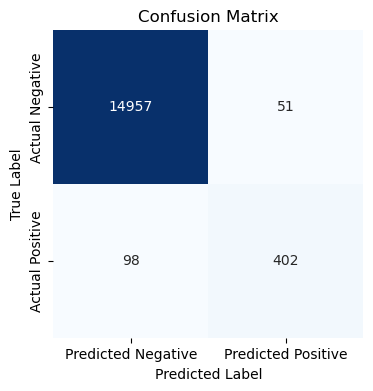

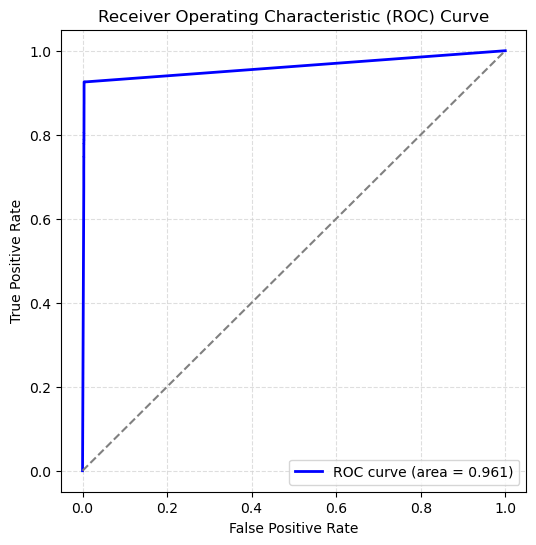

In [15]:
# Init the model
et = ExtraTreesClassifier(random_state=1)

# Do Machine Learning
classModel(et, X_train, X_test, y_train, y_test)

#### Ada Boost

TRAIN METRICS
    Confusion Matrix: 
    [[59679   349]
 [   15  1985]]
    
    AUC: 0.9970335010328513

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.93      0.99      0.96     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    5   495]]
    
    AUC: 0.9964430970149254

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.93       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


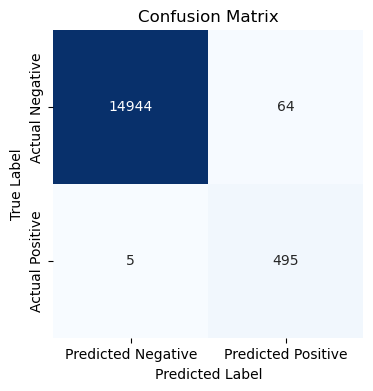

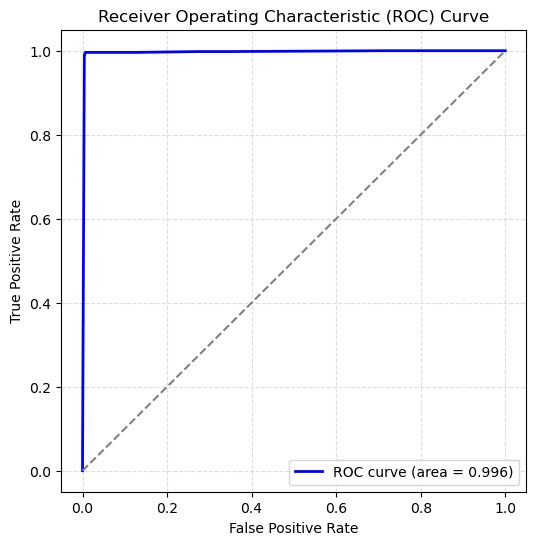

In [16]:
# Init the Model
ada = AdaBoostClassifier(random_state=1)

# Run the model
classModel(ada, X_train, X_test, y_train, y_test)

#### Gradient Boosting

TRAIN METRICS
    Confusion Matrix: 
    [[59691   337]
 [   11  1989]]
    
    AUC: 0.9984022372892651

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.86      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.93      0.99      0.96     62028
weighted avg       1.00      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    7   493]]
    
    AUC: 0.9953320895522388

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.93       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


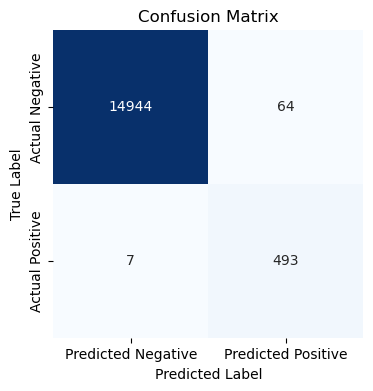

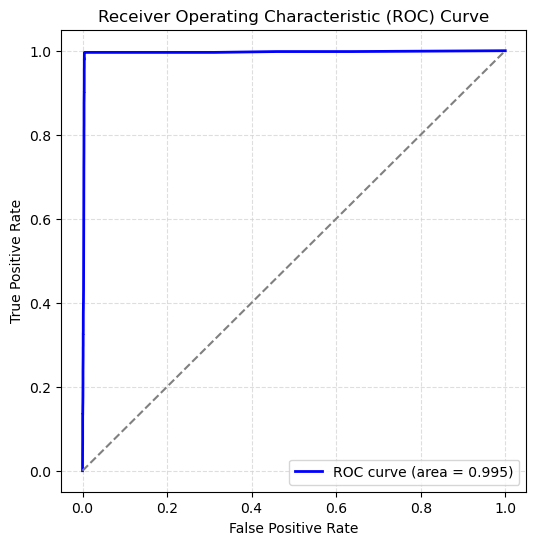

In [17]:
# Init the Model
gb = GradientBoostingClassifier(random_state=1)

# Run the model
classModel(gb, X_train, X_test, y_train, y_test)

#### XGBoost

TRAIN METRICS
    Confusion Matrix: 
    [[59679   349]
 [   14  1986]]
    
    AUC: 0.9977960535083629

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.93      0.99      0.96     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    4   496]]
    
    AUC: 0.995082289445629

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.94       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


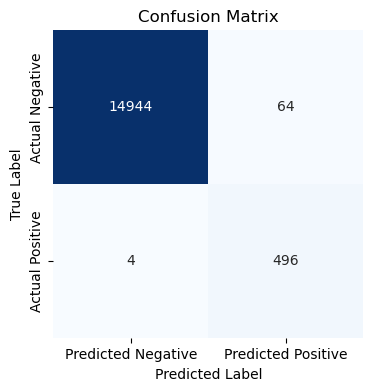

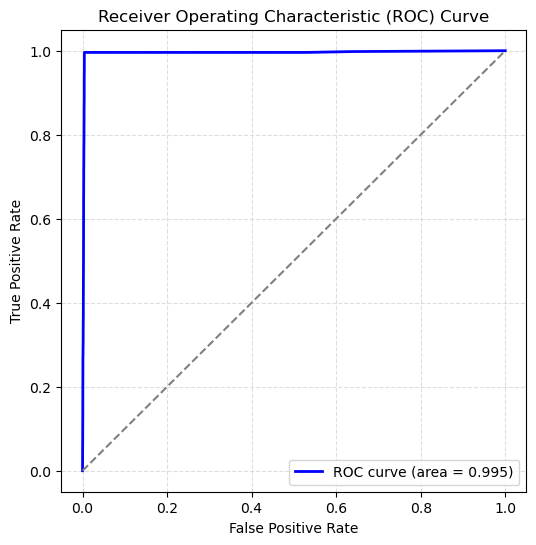

In [18]:
# Init the Model
xgb = XGBClassifier(random_state=1)

# Run the model
classModel(xgb, X_train, X_test, y_train, y_test)

#### Light GBM

TRAIN METRICS
    Confusion Matrix: 
    [[59678   350]
 [   14  1986]]
    
    AUC: 0.9981024563537017

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      0.99      1.00     60028
           1       0.85      0.99      0.92      2000

    accuracy                           0.99     62028
   macro avg       0.92      0.99      0.96     62028
weighted avg       0.99      0.99      0.99     62028

    
TEST METRICS
    Confusion Matrix: 
    [[14944    64]
 [    4   496]]
    
    AUC: 0.9958292910447761

    Classification Report:
                  precision    recall  f1-score   support

           0       1.00      1.00      1.00     15008
           1       0.89      0.99      0.94       500

    accuracy                           1.00     15508
   macro avg       0.94      0.99      0.97     15508
weighted avg       1.00      1.00      1.00     15508

    


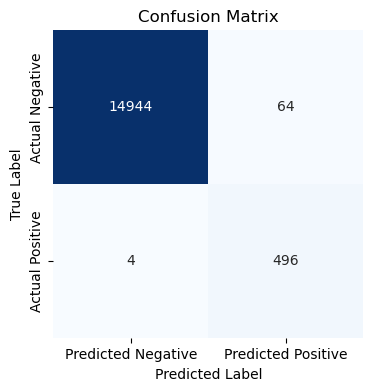

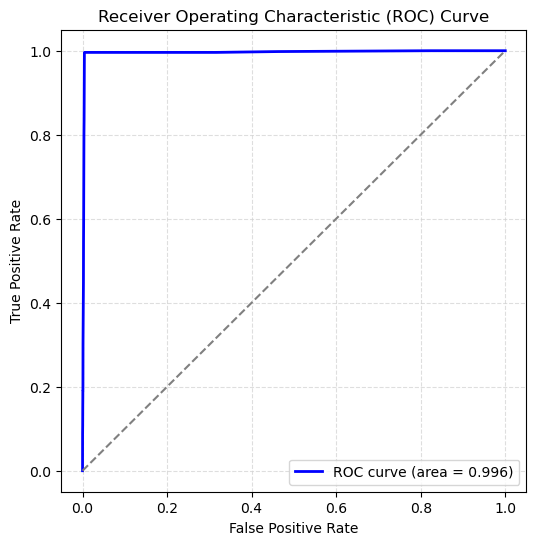

In [19]:
# Init the Model
lgbm = LGBMClassifier(random_state=1, verbose=-1)

# Run the model
classModel(lgbm, X_train, X_test, y_train, y_test)

### Summary
---
All of the additional models have similar results to the Logistic Regression. Given that the Logistic Regression is the most explainable and quickest to run model, there is no need to use more complex mathematical or tree-based models.\
\
The best model is the Logistic Regression.